Index(['time[s]', 'PML I WT', 'PML I -/-', 'PML II WT', 'PML II -/- mobil',
       'PML II -/- immobil', 'PML III WT', 'PML III -/-', 'PML IV WT',
       'PML IV -/- mobil', 'PML IV -/- immobil', 'PML V WT', 'PML V -/-',
       'PML VI WT', 'PML VI -/-'],
      dtype='object')
No handles with labels found to put in legend.


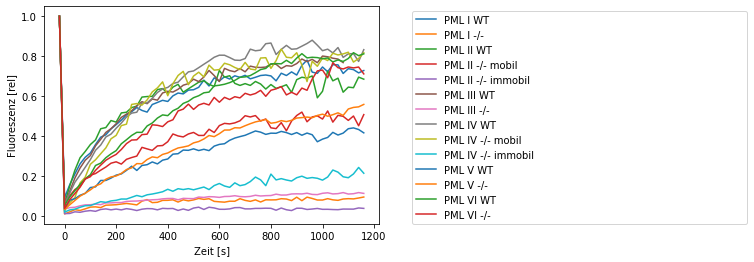

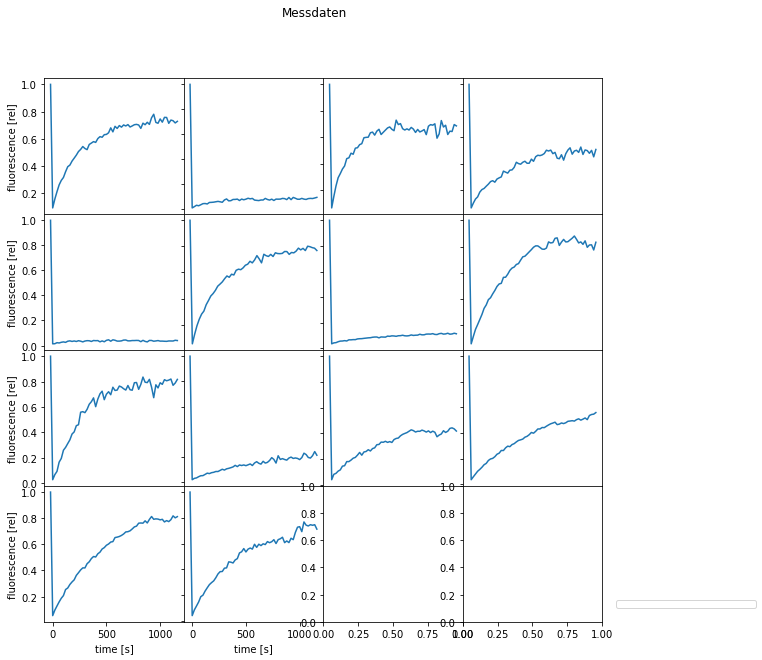

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
csv = pd.read_csv('./../Daten/FRAP_comparison_all_new_AssemblyDynamicsOfPMLNuclearBodiesInLivingCells_HeaderEdit.csv',delimiter=';',decimal=',')
# print(csv.columns)
# csv.drop() die letzten  Spalten einfach wegschmeißen, da diese ohnehin leer sind
csv = csv.drop(['Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26'], axis=1)
print(csv.columns)
csv.to_csv('./../Daten/FRAP_comparison_all_new_AssemblyDynamicsOfPMLNuclearBodiesInLivingCells_cleaned.csv',index=False)

for col in csv.columns[1:]:
    plt.plot(csv['time[s]'], csv[col])
plt.xlabel('Zeit [s]')
plt.ylabel('Fluoreszenz [rel]')
plt.legend(csv.columns[1:], loc=(1.1, 0.0), mode="expand", borderaxespad=0.)
plt.savefig('./../Daten/Messdaten.png')

figure, axs = plt.subplots(4, 4, gridspec_kw={"hspace": 0, "wspace": 0}, figsize=(10,10))  # sharex="col", sharey="row", 
figure.suptitle("Messdaten")

# plotte die Einzelkurven in je ein Bild
for i in range(1, len(csv.columns)):
    axs.flat[i-1].plot(csv['time[s]'], csv[csv.columns[i]], label=csv.columns[i])

    axs.flat[i-1].set(xlabel='time [s]', ylabel='fluorescence [rel]')
    axs.flat[i-1].label_outer()

# create the legend beneath the plots
plt.legend(loc=(1.1, 0.1), mode="expand", borderaxespad=0.)

# for col, ax in (csv.columns[1:], axs.flat):
#     ax.plot(csv['time[s]'], csv[col], label=col)